# BUSINESS QUESTION : FIGURE OUT THE TOP 5 CATEGORIES WITH LARGEST POPULARITY

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
#Uploading datasets for analysis
content_data= r'Content.csv'

reaction_data= r'Reactions.csv'

reaction_type_data =  r"ReactionTypes.csv"

content_data_df=pd.read_csv(content_data)
reaction_data_df=pd.read_csv(reaction_data)
reaction_type_data_df = pd.read_csv(reaction_type_data)


# CLEANING CONTENT DATASET

In [4]:
#Content dataset

#drop all null values from the dataset
cl_content_data_df= content_data_df.dropna(axis=0)

#drop irrelevant columns
cl_content_data_df= content_data_df.drop(['Unnamed: 0','User ID', 'URL'], axis=1)
cl_content_data_df.rename(columns = { 'Type': 'Content Type'}, inplace = True)

#Remove all string quoatations
cl_content_data_df = cl_content_data_df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


#cl_content_data_df= cl_content_data_df.rename(columns={'Category': 'name'})
cl_content_data_df['Category'] = cl_content_data_df['Category'].str.lower()
cl_content_data_df


,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


# DATA CLEANING OF REACTIONS DATASET

In [5]:
#Reactions Dataset cleaning

#drop null values
cl_reaction_data_df= reaction_data_df.dropna(how='any', inplace=True)

#drop irrelevant columns not needed for the question to be answered
cl_reaction_data_df= reaction_data_df.drop(['Unnamed: 0','User ID'], axis=1)


cl_reaction_data_df

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25547,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


# CLEANING OF REACTION TYPE DATASET

In [6]:
#drop irrelevant colunms
cl_reaction_type_data_df= reaction_type_data_df.drop(['Unnamed: 0'], axis=1)


cl_reaction_type_data_df

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


# MERGING THE THREE DATASETS TO HELP ANSWER THE BUSINESS QUESTION

In [7]:
#merge three data sets 
merge_data = cl_reaction_data_df.merge(cl_content_data_df, on='Content ID')
merge_data

,Content ID,Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [8]:
#Merge dataset of content, reaction and reaction type together
merge_df2 = pd.merge(merge_data,cl_reaction_type_data_df,on='Type')
merge_df2['Datetime'] = pd.to_datetime(merge_df2['Datetime'])
#merge_df2= merge_df2.set_index('Datetime')
merge_df2

,Content ID,Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [9]:
# Group by Category and sort to obtain the top five categories with largest popularity 

merge_df3 = merge_df2.groupby('Category')['Score'].sum().sort_values(ascending= False)

# TOP 5 CATEGORIES WITH LARGEST POPULARITY

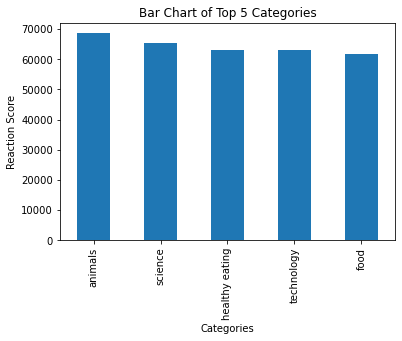

In [10]:
#selecting top 5 of the 16 categories
top_5 = merge_df3[0:5]

# create a bar chart
top_5.plot(kind='bar')

# set the chart title and axis labels
plt.title('Bar Chart of Top 5 Categories')
plt.xlabel('Categories')
plt.ylabel('Reaction Score')

#show the chart
plt.show()

# Visualization of Top 5 categories

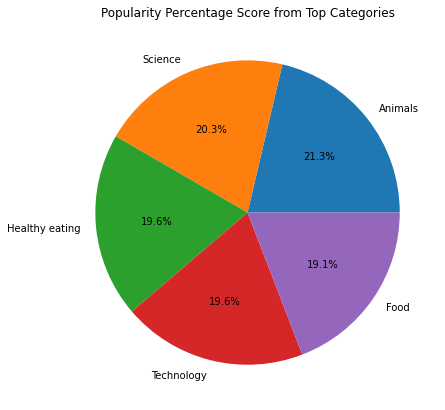

In [11]:
categories = ['Animals','Science','Healthy eating', 'Technology','Food']

#Ceating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(top_5, labels = categories, autopct='%1.1f%%')
plt.title('Popularity Percentage Score from Top Categories')
#showing plot

plt.show()

# Number of Unique Categories

In [12]:
#unique categories of the existing contents
unique_cat= merge_df2['Category'].unique()
unique_cat

array(['studying', 'healthy eating', 'dogs', 'public speaking', 'science',
       'tennis', 'food', 'fitness', 'soccer', 'education', 'travel',
       'veganism', 'cooking', 'technology', 'animals', 'culture'],
      dtype=object)

# Month with Popular Posts

In [13]:
#Month with popular post process

posts_by_months=merge_df2.groupby(merge_df2['Datetime'].dt.month_name())['Datetime'].count()
max_month = posts_by_months.idxmax()


In [14]:
#post for all months
posts_by_months

Datetime
April        1801
August       1945
December     1941
February     1750
January      1949
July         1884
June         1836
March        1857
May          1954
November     1866
October      1889
September    1862
Name: Datetime, dtype: int64

In [15]:
#print month with most post
print(f"The month with the most posts is {max_month}")

The month with the most posts is May


# Number of reactions to the most popular category

In [16]:
#reactions to the most popular category

reactions_by_category = merge_df2.groupby('Category')['Type'].count()

#Printing categories with most reactions
max_cat = reactions_by_category.idxmax()
reactions_by_category

Category
animals            1738
cooking            1525
culture            1538
dogs               1227
education          1311
fitness            1284
food               1556
healthy eating     1572
public speaking    1116
science            1646
soccer             1339
studying           1251
technology         1557
tennis             1218
travel             1510
veganism           1146
Name: Type, dtype: int64

In [17]:
print(f"The most popular category is {max_cat} and has reactions of {max_categ}")


NameError: name 'max_categ' is not defined